# **Project: Train a logistic Regression classification model on the Titanic data set**
+ Use a machine learning model to predict passenger survival on the Titanic

### **Imports**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import confusion_matrix
%matplotlib inline


In [2]:
df = pd.read_csv('Data/train.csv')

In [3]:
df = df.set_index('PassengerId')

## **Explore Data**

In [4]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info

<bound method DataFrame.info of              Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
...               ...     ...   
887                 0       2   
888                 1       1   
889                 0       3   
890                 1       1   
891                 0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William H

In [6]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

### Identify dependencies of survivability and other parameters

<AxesSubplot:xlabel='Age', ylabel='Count'>

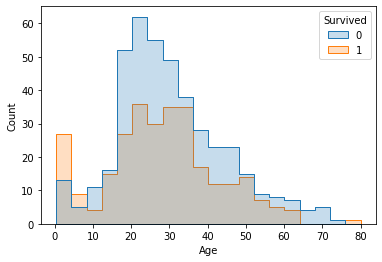

In [7]:
sns.histplot(x='Age', hue= 'Survived',
            data=df, stat= 'count', bins = 20, element = 'step')
#very old and very young seem to survive more

<AxesSubplot:xlabel='Sex', ylabel='count'>

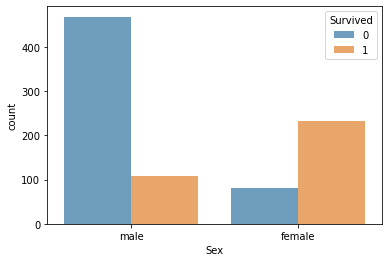

In [8]:
sns.countplot(x='Sex', hue= 'Survived',
            data=df, alpha = 0.7)
# females seem to survive more than men

<AxesSubplot:xlabel='Pclass', ylabel='count'>

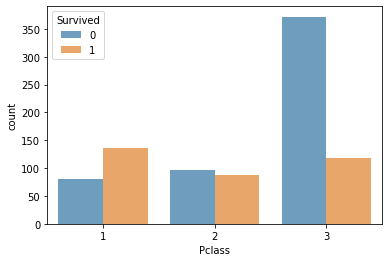

In [9]:
sns.countplot(x='Pclass', hue= 'Survived',
            data=df, alpha = 0.7)
# People in first class survive more / less people in thirs class survive

<AxesSubplot:xlabel='SibSp', ylabel='count'>

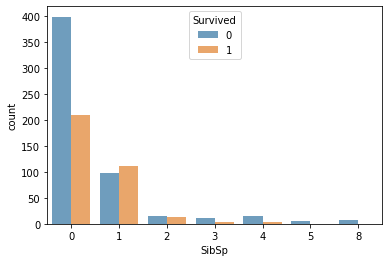

In [10]:
sns.countplot(x='SibSp', hue= 'Survived',
            data=df, alpha = 0.7)
# people without a Spouse or sibling did survive less

<AxesSubplot:xlabel='Parch', ylabel='count'>

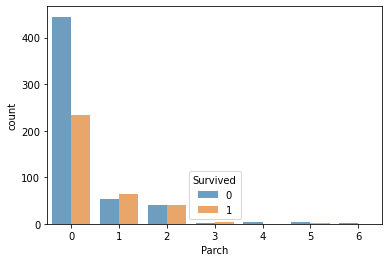

In [11]:
sns.countplot(x='Parch', hue= 'Survived',
            data=df, alpha = 0.7)
# people without a parent or child did survive less

<AxesSubplot:xlabel='Embarked', ylabel='count'>

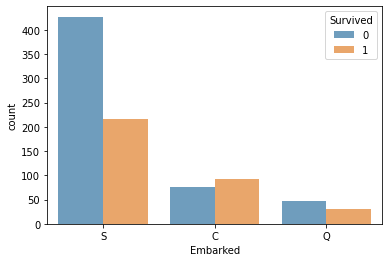

In [12]:
sns.countplot(x='Embarked', hue= 'Survived',
            data=df, alpha = 0.7)
# C = Cherbourg; Q = Queenstown; S = Southampton
# People from Cherbourg had a higher chance to survive
# People from Southampton did not survive much

In [13]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Define Input and Target Variables

In [14]:
# input independant variables (features)
X = df[['Age', 'Sex','Pclass' ,'SibSp', 'Parch','Fare' ,'Embarked']]
# target variable
y = df['Survived']

### Train-Test Split

In [15]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.20,random_state=141)

In [16]:
#Check Shape
Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape

((712, 7), (712,), (179, 7), (179,))

## **Feature Engineering Data**

In [17]:
Xtrain.info()
# Entries for 'Age' and Embark are missing  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 17 to 631
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       575 non-null    float64
 1   Sex       712 non-null    object 
 2   Pclass    712 non-null    int64  
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  710 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 44.5+ KB


In [18]:
Xtrain.head()
# Sex need to be transformed into binary value. 
# Age and Fare need to be scaled. 
# 'Embarked' need to be one hot coded

,Age,Sex,Pclass,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
17,2.0,male,3,4,1,29.1250,Q
196,58.0,female,1,0,0,146.5208,C
354,25.0,male,3,1,0,17.8000,S
112,14.5,female,3,1,0,14.4542,C
383,32.0,male,3,0,0,7.9250,S


### Imputation: Adding missing Values to Age and Embarked

In [19]:
sum(Xtrain['Embarked'].isna()), sum(Xtrain['Age'].isna()), sum(Xtest['Embarked'].isna()), sum(Xtest['Age'].isna()), 

(2, 137, 0, 40)

In [20]:
#add missing value of Xtrain for 'Embarked'
emb = Xtrain['Embarked'].mode()
Xtrain=Xtrain.fillna({"Embarked":str(emb)})

In [21]:
#add missing value of Xtest for 'Embarked'
emb_t = Xtest['Embarked'].mode()
Xtest=Xtest.fillna({"Embarked":str(emb)})

In [22]:
#add missing value of Xtrain for 'Age'
age = Xtrain['Age'].mean()
Xtrain=Xtrain.fillna({"Age":age})

In [23]:
#add missing value of Xtest for 'Age'
age_t = Xtest['Age'].mean()
Xtest=Xtest.fillna({"Age":age_t})

In [24]:
# Check if all missing values are filled
Xtrain.info(), Xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 17 to 631
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       712 non-null    float64
 1   Sex       712 non-null    object 
 2   Pclass    712 non-null    int64  
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 44.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 180 to 410
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       179 non-null    float64
 1   Sex       179 non-null    object 
 2   Pclass    179 non-null    int64  
 3   SibSp     179 non-null    int64  
 4   Parch     179 non-null    int64  
 5   Fare      179 non-null    float64
 6   Embarked  179 non-null    object 
dtypes: float64(2), int6

(None, None)

In [25]:
#check the Shape
Xtrain.shape, Xtest.shape

((712, 7), (179, 7))

### Scaling

In [26]:
#ScaleAge
scaler_age = MinMaxScaler()
Xtrain['Age_Scaled'] = scaler_age.fit_transform(Xtrain[['Age']])
Xtest['Age_Scaled'] = scaler_age.transform(Xtest[['Age']])

In [27]:
Xtrain = Xtrain.drop('Age',axis=1)
Xtest = Xtest.drop('Age',axis=1)

In [28]:
#ScaleFare
scaler_fare = MinMaxScaler()
Xtrain['Fare_Scaled'] = scaler_fare.fit_transform(Xtrain[['Fare']])
Xtest['Fare_Scaled'] = scaler_fare.transform(Xtest[['Fare']])

In [29]:
Xtrain = Xtrain.drop('Fare',axis=1)
Xtest = Xtest.drop('Fare',axis=1)

In [30]:
#Check the shape
Xtrain.shape

(712, 7)

### One Hot coding

In [31]:
#Mapping of the 'Sex'
Xtrain['Sex_int'] =Xtrain['Sex'].map({'female':1,'male':0})
Xtest['Sex_int'] =Xtest['Sex'].map({'female':1,'male':0})

In [32]:
Xtrain = Xtrain.drop('Sex',axis=1)
Xtest = Xtest.drop('Sex',axis=1)

In [33]:
Xtrain.shape, Xtest.shape

((712, 7), (179, 7))

In [34]:
#One Hot Coding of 'Embarked'
Xtrain[['Unnamed','C','Q','S']] = pd.get_dummies(Xtrain['Embarked'])
Xtest[['C','Q','S']] = pd.get_dummies(Xtest['Embarked'])

In [35]:
Xtrain['Embarked'].unique() , Xtest['Embarked'].unique() 

(array(['Q', 'C', 'S', '0    S\ndtype: object'], dtype=object),
 array(['S', 'C', 'Q'], dtype=object))

In [36]:
Xtrain = Xtrain.drop('Embarked',axis=1)
Xtrain = Xtrain.drop('Unnamed',axis=1)
Xtest = Xtest.drop('Embarked',axis=1)

In [37]:
Xtrain

,Pclass,SibSp,Parch,Age_Scaled,Fare_Scaled,Sex_int,C,Q,S
PassengerId,,,,,,,,,
17,3,4,1,0.019854,0.056848,0,0,1,0
196,1,0,0,0.723549,0.285990,1,1,0,0
354,3,1,0,0.308872,0.034743,0,0,0,1
112,3,1,0,0.176929,0.028213,1,1,0,0
383,3,0,0,0.396833,0.015469,0,0,0,1
...,...,...,...,...,...,...,...,...,...
836,1,1,1,0.484795,0.162314,1,1,0,0
616,2,1,2,0.296306,0.126872,1,0,0,1
26,3,1,5,0.472229,0.061264,1,0,0,1


# **Building Model**

In [38]:
# instantiate the model
m = LogisticRegression(max_iter=1000)

# **Fit/ Train Model**

In [39]:
Xtrain.shape, ytrain.shape

((712, 9), (712,))

In [40]:
type(Xtrain), type(ytrain)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [41]:
#fit model
m.fit(Xtrain,ytrain)

LogisticRegression(max_iter=1000)

In [42]:
ytrain

PassengerId
17     0
196    1
354    0
112    0
383    0
      ..
836    1
616    1
26     1
562    0
631    1
Name: Survived, Length: 712, dtype: int64

In [43]:
Xtrain

,Pclass,SibSp,Parch,Age_Scaled,Fare_Scaled,Sex_int,C,Q,S
PassengerId,,,,,,,,,
17,3,4,1,0.019854,0.056848,0,0,1,0
196,1,0,0,0.723549,0.285990,1,1,0,0
354,3,1,0,0.308872,0.034743,0,0,0,1
112,3,1,0,0.176929,0.028213,1,1,0,0
383,3,0,0,0.396833,0.015469,0,0,0,1
...,...,...,...,...,...,...,...,...,...
836,1,1,1,0.484795,0.162314,1,1,0,0
616,2,1,2,0.296306,0.126872,1,0,0,1
26,3,1,5,0.472229,0.061264,1,0,0,1


In [44]:
#Check 
w_1 = m.coef_[0][0]
w_2 = m.coef_[0][1]
w_3 = m.coef_[0][2]
w_4 = m.coef_[0][3]
w_5 = m.coef_[0][4]
w_6 = m.coef_[0][5]
w_7 = m.coef_[0][6]
w_8 = m.coef_[0][7]
w_0 = m.intercept_[0]

In [45]:
f' intercept:{w_0}, coefficients {w_1, w_2, w_3, w_4, w_5, w_6, w_7, w_8}'

' intercept:1.56682937828, coefficients (-0.9280144543641449, -0.28717505046081104, 0.025618516423796204, -1.7799314206150887, 0.6999825243835563, 2.5847255562683964, 0.1162400916140054, -0.006891169724780992)'

# **Cross Validation**

In [46]:
cross_validation_tita = cross_val_score(estimator=m, # the model to evaluate
                                     X=Xtrain,
                                     y=ytrain,
                                     scoring='accuracy', # evaluation metrics
                                     cv=10,
                                     verbose=3) # cross validation splitting

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] END ................................ score: (test=0.764) total time=   0.1s
[CV] END ................................ score: (test=0.833) total time=   0.1s
[CV] END ................................ score: (test=0.817) total time=   0.0s
[CV] END ................................ score: (test=0.775) total time=   0.0s
[CV] END ................................ score: (test=0.746) total time=   0.0s
[CV] END ................................ score: (test=0.775) total time=   0.0s
[CV] END ................................ score: (test=0.789) total time=   0.0s
[CV] END ................................ score: (test=0.831) total time=   0.0s
[CV] END ................................ score: (test=0.732) total time=   0.0s
[CV] END ................................ score: (test=0.803) total time=   0.0s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished


In [47]:
print(f'Validation accuracy scores: {np.round(cross_validation_tita,2)}')
print(f'\nmean: {cross_validation_tita.mean():.2}')
print(f'std: {cross_validation_tita.std():.1}')

Validation accuracy scores: [0.76 0.83 0.82 0.77 0.75 0.77 0.79 0.83 0.73 0.8 ]

mean: 0.79
std: 0.03


# **Calculate the train and test accuracy**

In [48]:
f' train: {m.score(Xtrain,ytrain)}, test: {m.score(Xtest,ytest)}'

' train: 0.797752808988764, test: 0.7988826815642458'

In [49]:
ypred = m.predict(Xtrain) #generating predictive results
accuracy_score(ytrain,ypred), recall_score(ytrain,ypred)

(0.797752808988764, 0.7007299270072993)

# **Confusion matrix**

In [50]:
conf = confusion_matrix(ytrain,ypred)
conf

array([[376,  62],
       [ 82, 192]])

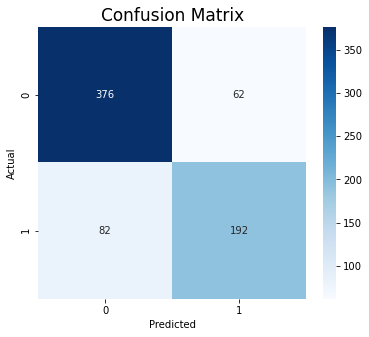

In [51]:
plt.figure(figsize=(6,5))
sns.heatmap(conf,
            xticklabels = np.unique(y),
            yticklabels = np.unique(y),
            cmap = 'Blues',
            annot=True,
            fmt='g')                

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix", fontsize=17)
plt.savefig('Confusion Matrix', dpi=100, facecolor= 'white')


# **Train a Random Forest classification model**

In [52]:
# instantiate the model
rf = RandomForestClassifier(n_estimators=250, max_depth=4, random_state=14)
# fit the model 
rf.fit(Xtrain,ytrain)

RandomForestClassifier(max_depth=4, n_estimators=250, random_state=14)

In [53]:
# evaluate the model
print(f'The accuracy of the RF on on the train data is {rf.score(Xtrain,ytrain):.3f}')
print(f'\n' f'The accuracy of the RF on on the test data is {rf.score(Xtest,ytest):.3f}')

The accuracy of the RF on on the train data is 0.840

The accuracy of the RF on on the test data is 0.832


### Calculate the importance of the independant variables

In [54]:
fi = pd.DataFrame({'feature': list(Xtrain.columns),
                   'importance': rf.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi

,feature,importance
5,Sex_int,0.506740
4,Fare_Scaled,0.181500
0,Pclass,0.115817
3,Age_Scaled,0.088543
1,SibSp,0.044157
2,Parch,0.024569
8,S,0.018880
6,C,0.013062
7,Q,0.006733


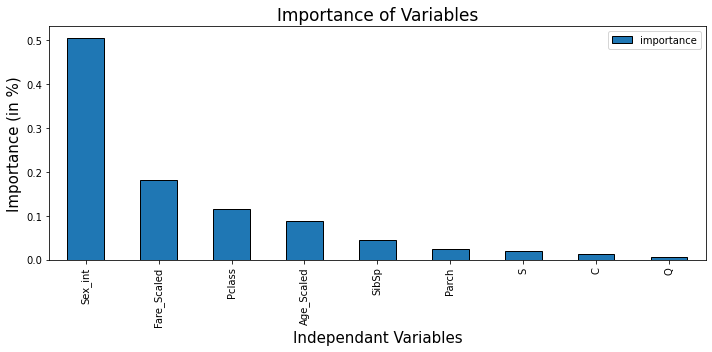

In [55]:
# plot the importance of the independant variables
fi.set_index(['feature']).plot.bar(figsize= [10,5], edgecolor= 'black' )
plt.title("Importance of Variables", fontsize=17)
plt.xlabel('Independant Variables', fontsize= 15)
plt.ylabel('Importance (in %)', fontsize= 15)
plt.tight_layout()
plt.savefig(fname = 'Importance of independant variables', format = 'jpg', dpi=100)

### Create a decision tree to plot a Tree Diagram

In [56]:
#### instantiate the descion tree model
dt = DecisionTreeClassifier(max_depth=4,random_state=10)
# fit the model 
dt.fit(Xtrain,ytrain)

DecisionTreeClassifier(max_depth=4, random_state=10)

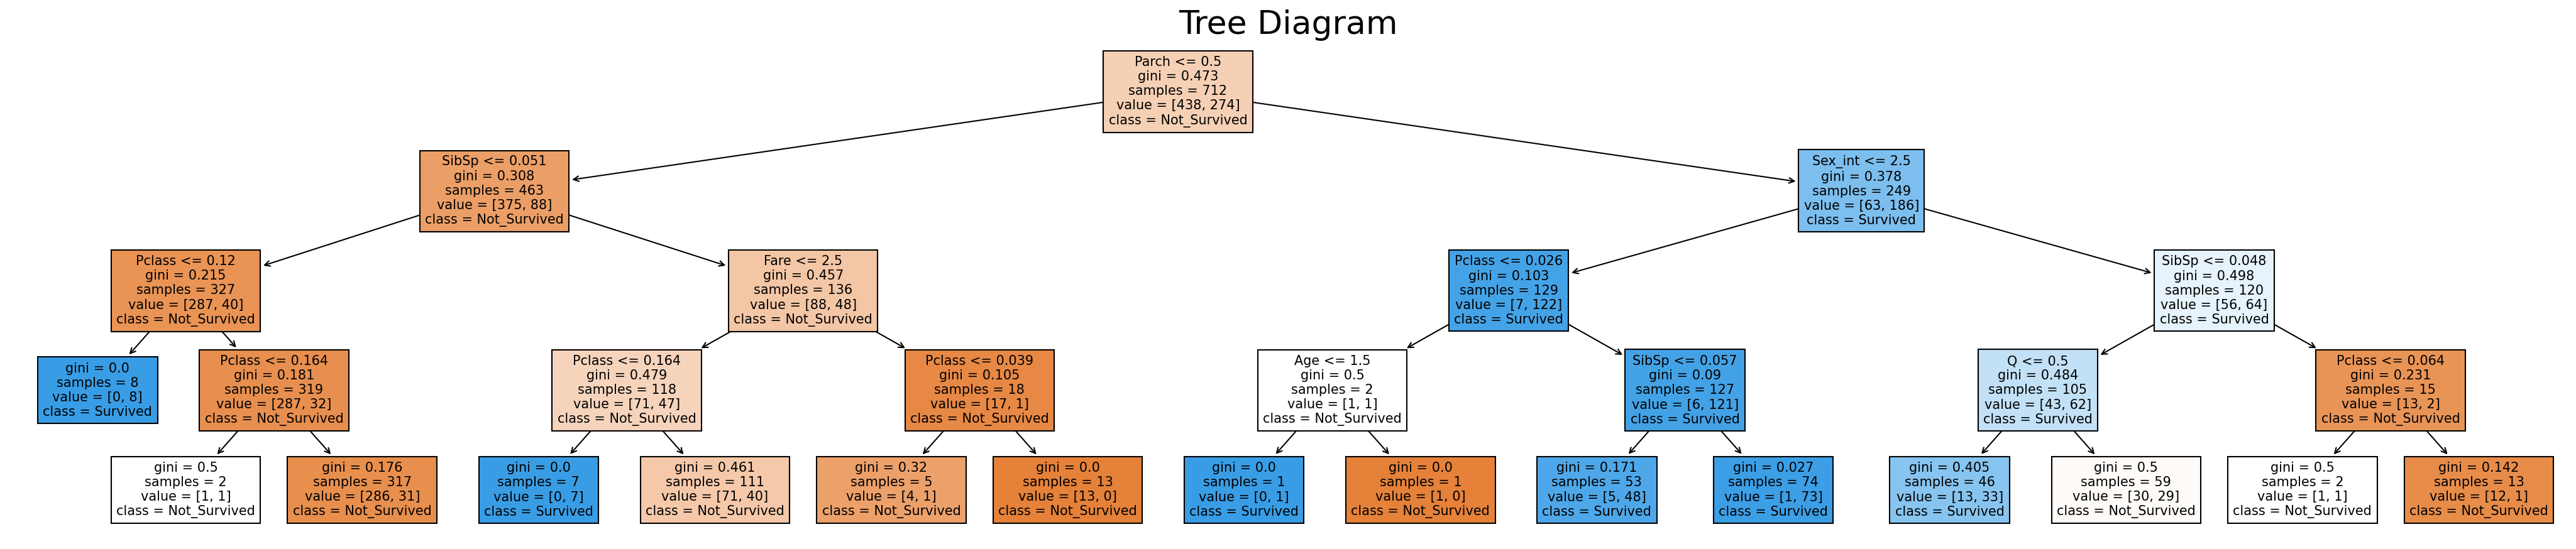

In [57]:
plt.figure(figsize= [35,7], dpi=150, facecolor='white', edgecolor= 'black' )
t = plot_tree(dt,feature_names=['Sex_int', 'Fare','Age','Pclass', 'SibSp','Parch','S','C','Q' ],fontsize=10, class_names=["Not_Survived", "Survived"], filled=True)
plt.title('Tree Diagram', fontsize= 25)
plt.savefig('Tree Diagram' )